1. Okazaki fragments

2. Hamming distance

In [7]:
seq1 = 'CAGAAAGGAAGGTCCCCATACACCGACGCACCAGTTTA'
seq2 = 'CACGCCGTATGCATAAACGAGCCGCACGAACCAGAGAG'

# calculate the number of mismatches between two sequences
def hamming_distance(sequence1, sequence2):
    hamming_distance = sum([1 for n1,n2 in zip(sequence1, sequence2) if n1 != n2])
    return hamming_distance

hamming_distance(seq1, seq2)

23

3. Identify the value of i for which Skewi (GCATACACTTCCCAGTAGGTACTG) attains a maximum value.

In [14]:
def max_skew_idx(sequence):
    skew = 0
    skew_list = [0] + [skew := skew + (1 if nt == 'G' else -1 if nt == 'C' else 0) for nt in sequence]
    min_value = max(skew_list)
    min_indices = [i for i, x in enumerate(skew_list) if x == min_value]
    return skew_list, min_indices

# Test the function
skew_list, min_skew_indices = max_skew_idx('CATTCCAGTACTTCATGATGGCGTGAAGA')
min_skew_indices
# print("Indices with max skew:", *max_skew_idx, sep=' ')

[28, 29]

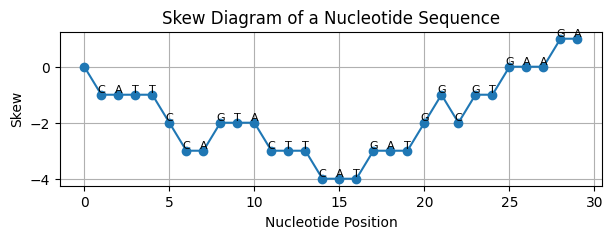

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7,2))

# Define x-axis points
seq = 'CATTCCAGTACTTCATGATGGCGTGAAGA'
res = skew_list
x_points = range(len(res))

# Plot the skewness values
ax.plot(x_points, res, marker='o', linestyle='-')

# Annotate each data point with the corresponding nucleotide
for i, nt in zip(x_points, seq):
    plt.text(i+1, res[i+1], nt, ha='center', va='bottom', fontsize=8)

# Labeling the axes
plt.xlabel('Nucleotide Position')
plt.ylabel('Skew')

# Title of the plot
plt.title('Skew Diagram of a Nucleotide Sequence')

# Display the plot
plt.grid(True)
plt.show()

4. Compute Count1(CATGCCATTCGCATTGTCCCAGTGA, CCC)

In [17]:
tkmer = 'CCC'
tseq = 'CATGCCATTCGCATTGTCCCAGTGA'
tmax = 2

def approx_pattern_matching_idx(pattern, sequence, mismatch_max):
    positions = []
    for i in range(len(sequence)-len(pattern)+1):
        window = sequence[i: i+len(pattern)]
        hamming_distance = sum([n1 != n2 for n1,n2 in zip(pattern, window)])
        if hamming_distance <= mismatch_max:
            positions.append(i)
    return positions

print(len(approx_pattern_matching_idx(tkmer, tseq, tmax)), sep=' ')

15


5. How many x-mers are in the x-neighborhood of Pattern = x?

In [8]:
def neighbors(pattern, d):
    nucleotides = ['A', 'C', 'G', 'T']
    if d == 0:
        return {pattern}
    if len(pattern) == 1:
        return set(nucleotides)
    neighborhood = set()
    suffix_neighbors = neighbors(pattern[1:], d) #recursive call
    for text in suffix_neighbors:
        if hamming_distance(pattern[1:], text) < d:
            for x in nucleotides:
                neighborhood.add(x + text)
        else:
            neighborhood.add(pattern[0] + text)
    return list(neighborhood)

print(len(neighbors('TGCAT',2)))

106
